In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [11]:
filepath = "../dataset/"
file= filepath +'training_data.csv'

training_data = pd.read_csv(file)

bag_of_words_bot = 'bot|b0t'

# Performing Feature Engineering

In [12]:
training_data['screen_name_binary'] = training_data.screen_name.str.contains(bag_of_words_bot, case=False, na=False)
training_data['name_binary'] = training_data.name.str.contains(bag_of_words_bot, case=False, na=False)
training_data['description_binary'] = training_data.description.str.contains(bag_of_words_bot, case=False, na=False)
training_data['status_binary'] = training_data.status.str.contains(bag_of_words_bot, case=False, na=False)
training_data['listed_count_binary'] = (training_data.listed_count>20000)==False

features = ['screen_name_binary', 'name_binary', 'description_binary', 'status_binary', 'verified', 'followers_count', 'friends_count', 'statuses_count', 'listed_count_binary', 'bot']

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

y = training_data.bot
X = training_data[features].iloc[:,:-1]

# Implementing Different Models

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier


classificators = [
    DecisionTreeClassifier(),
    MultinomialNB(),
    RandomForestClassifier(),
    LinearSVC(),
    LogisticRegression(),
    GaussianNB(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    Perceptron()
]

In [50]:
def train_and_test(model):
    print(model.__class__.__name__)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

    model = model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print("Trainig Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
    print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))
    print("Confusion matrix: ")
    print(confusion_matrix(y_test, y_pred_test))
    print("Classification report: ")
    print(classification_report(y_test, y_pred_test))
    print()
    return X_train, X_test, y_train, y_test, model

In [51]:
for model in classificators:
    train_and_test(model)

DecisionTreeClassifier
Trainig Accuracy: 1.00000
Test Accuracy: 0.86905
Confusion matrix: 
[[377  46]
 [ 64 353]]
Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       423
           1       0.88      0.85      0.87       417

   micro avg       0.87      0.87      0.87       840
   macro avg       0.87      0.87      0.87       840
weighted avg       0.87      0.87      0.87       840


MultinomialNB
Trainig Accuracy: 0.68063
Test Accuracy: 0.69762
Confusion matrix: 
[[181 242]
 [ 12 405]]
Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.43      0.59       423
           1       0.63      0.97      0.76       417

   micro avg       0.70      0.70      0.70       840
   macro avg       0.78      0.70      0.67       840
weighted avg       0.78      0.70      0.67       840


RandomForestClassifier
Trainig Accuracy: 0.99029
Test Accuracy: 0.89286
Confu

In [1]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification

In [8]:
X, y = make_classification(n_samples=training_data.shape[0],
                           n_features=8,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)
forest = RandomForestClassifier(n_estimators=250,
                              random_state=0)
forest.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

Feature ranking:
1. feature 6 (0.361349)
2. feature 5 (0.262729)
3. feature 7 (0.163145)
4. feature 4 (0.118208)
5. feature 2 (0.051039)
6. feature 3 (0.016493)
7. feature 0 (0.013551)
8. feature 1 (0.011866)
9. feature 8 (0.001619)


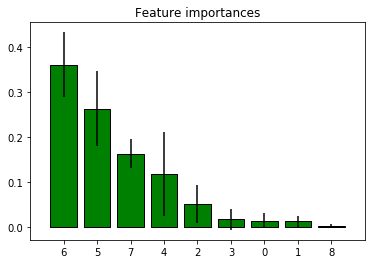

In [30]:
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="green", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [25]:
import pandas as pd
feature_importances = pd.DataFrame(forest.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
friends_count,0.361349
followers_count,0.262729
statuses_count,0.163145
verified,0.118208
description_binary,0.051039
status_binary,0.016493
screen_name_binary,0.013551
name_binary,0.011866
listed_count_binary,0.001619


In [47]:
from sklearn.externals import joblib
joblib.dump(forest, 'model.sav') 

['model.sav']